# ARTIFICIAL NEURAL NETWORKS

In [1]:
#Dataset: "Alphabets_data.csv"

In [2]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading Dataset
data = pd.read_csv('Alphabets_data.csv')

In [5]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# EDA & Data preprocessing 

In [6]:
data.shape

(20000, 17)

In [7]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
# Changing position of target column 'TEY'
Target = data['letter']
#Drop the existing column
data.drop(labels=['letter'], axis=1,inplace = True)
data.insert(0, 'Y', Target)

data = data.rename({'Y':'letter'}, axis = 1)

data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [10]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [11]:
data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [12]:
# Checking correlation between variables
data.corr()

C:\Users\Kajal\AppData\Local\Temp\ipykernel_6092\3881283338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


C:\Users\Kajal\AppData\Local\Temp\ipykernel_6092\2194316126.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


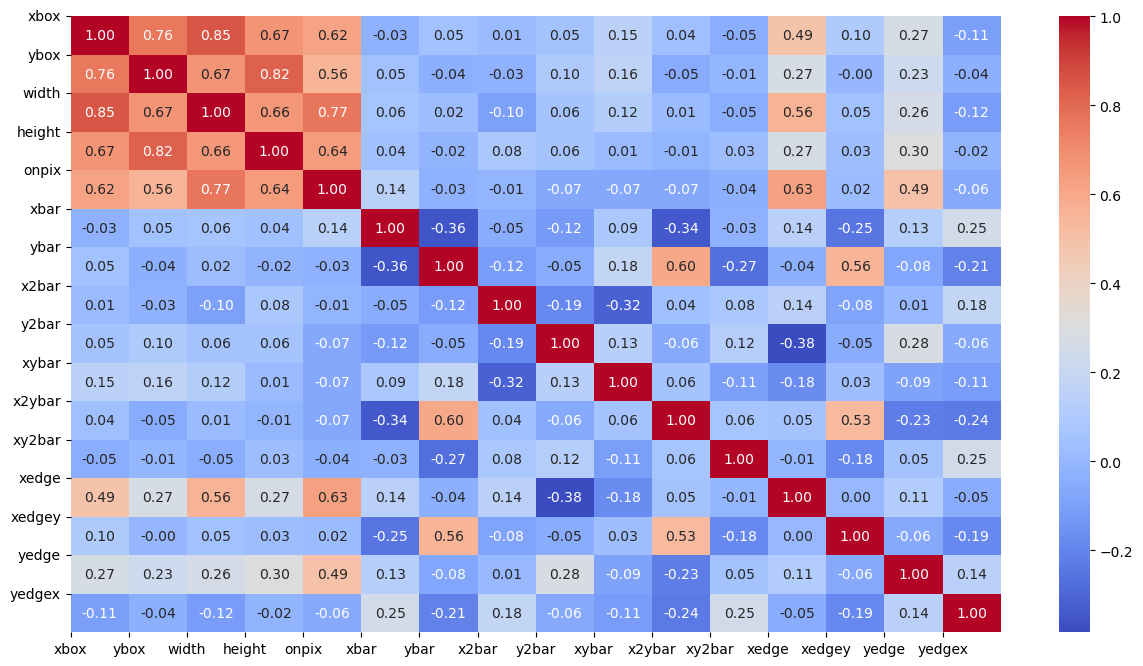

In [13]:
# Heatmap of correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

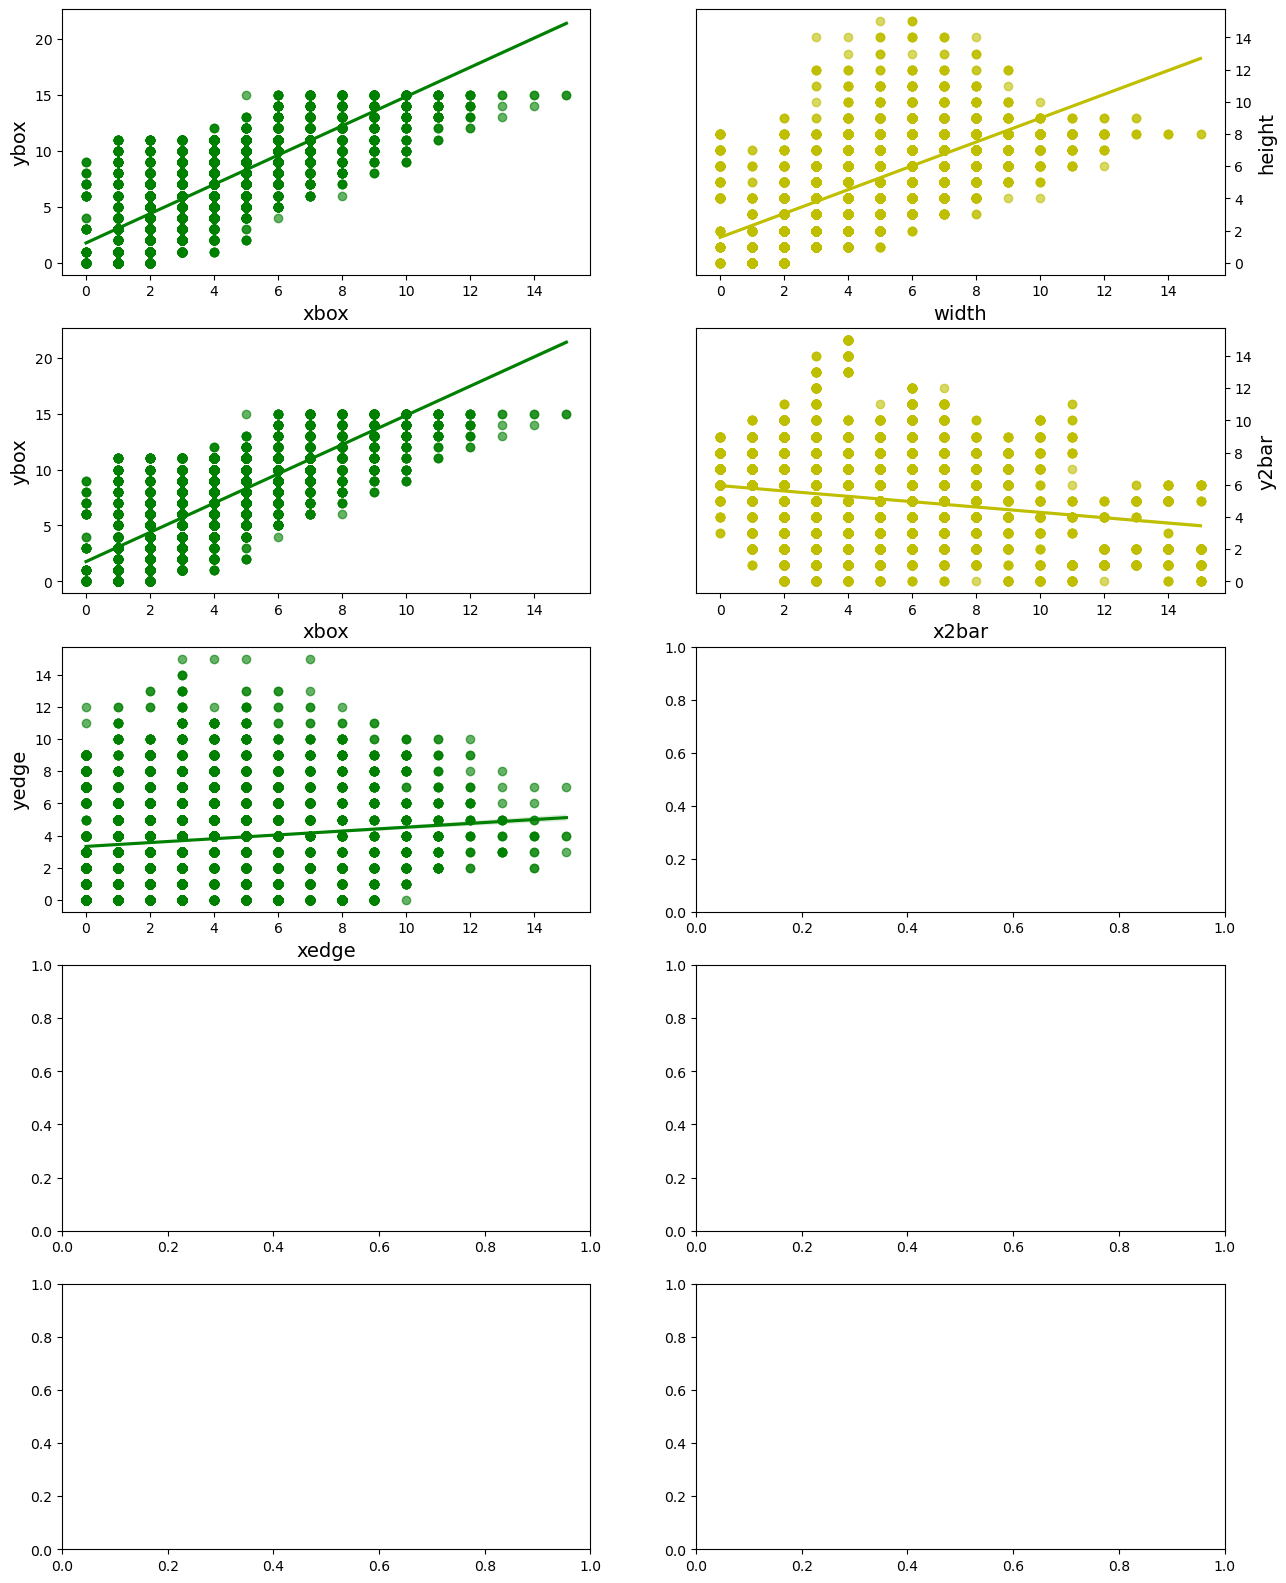

In [14]:
# plot regplots  for Age, KM, HP, CC, Doors, Gears, Quarterly_Tax and Weight against TEY 
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'xbox', y = 'ybox', data = data, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('xbox', fontsize = 14)
axes[0,0].set_ylabel('ybox', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'width', y = 'height', data = data, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('width', fontsize = 14)
axes[0,1].set_ylabel('height', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'xbox', y = 'ybox', data = data, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('xbox', fontsize = 14)
axes[1,0].set_ylabel('ybox', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'x2bar', y = 'y2bar', data = data, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('x2bar', fontsize = 14)
axes[1,1].set_ylabel('y2bar', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'xedge', y = 'yedge', data = data, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('xedge', fontsize = 14)
axes[2,0].set_ylabel('yedge', fontsize=14)
axes[2,0].yaxis.tick_left()

plt.show()

# Feature Selection by using Mutual Information Feature Selection

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [16]:
data1=data.drop(['letter'],axis=1)

In [17]:
X = data1.iloc[:,1:]
y = data1.iloc[:,0]

In [18]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [19]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.404840
Feature 1: 0.692534
Feature 2: 0.363845
Feature 3: 0.339733
Feature 4: 0.020402
Feature 5: 0.032877
Feature 6: 0.026219
Feature 7: 0.022558
Feature 8: 0.051729
Feature 9: 0.050646
Feature 10: 0.002509
Feature 11: 0.158292
Feature 12: 0.030248
Feature 13: 0.042170
Feature 14: 0.046248


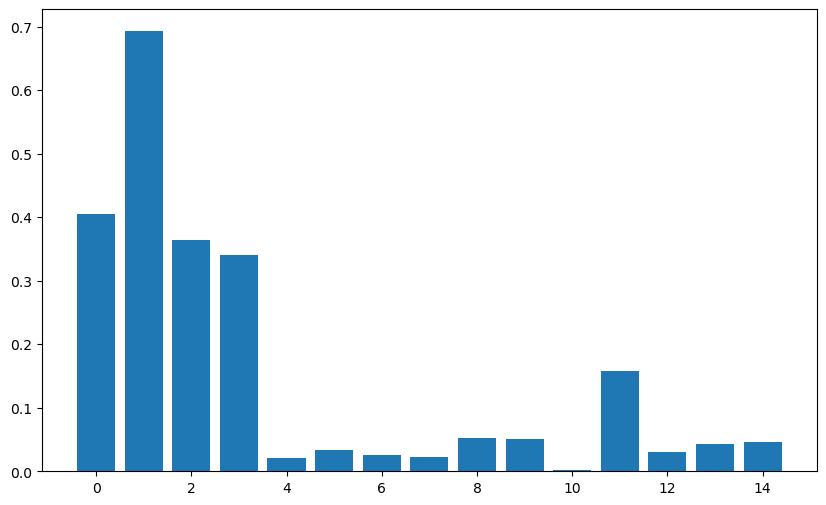

In [20]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# As per above feature selection method, we will select only features with good score to build our model 

In [25]:
X = data1.drop(['xedge','yedge','xbox','ybox','width','height'], axis = 1)

In [26]:
y = data1.iloc[:,0]

In [27]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
scaler.fit(X)

StandardScaler()

In [29]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [30]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedgey,yedgex
0,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-0.219082,0.122911
1,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.219082,1.359441
2,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.865626,0.741176
3,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.074008,0.122911
4,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.865626,1.359441
...,...,...,...,...,...,...,...,...,...,...
19995,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.219082,-0.495354
19996,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,0.427463,-0.495354
19997,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,2.367097,-2.350149
19998,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,0.427463,0.122911


In [31]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (14000, 10)
Shape of x_test:  (6000, 10)
Shape of y_train:  (14000,)
Shape of y_test:  (6000,)


# Artificial Neural Network Model - Backpropagation

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

C:\Users\Kajal\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [36]:
sc = StandardScaler() # don't perform standardization on target column
x = data1.drop(columns=['xbox'])# exclude Exited column
y = data1['xbox']

In [37]:
x = sc.fit_transform(x)
x

array([[ 0.29187713, -1.05327668, -0.16470367, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 1.5023577 , -1.05327668,  0.71973007, ..., -0.21908163,
         0.12008142,  1.35944092],
       [ 1.19973756,  0.43590966,  1.16194694, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 0.59449727,  0.43590966,  0.71973007, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.22122359, -0.55688123, -1.49135429, ...,  0.42746295,
         0.50963994,  0.12291107],
       [ 0.59449727,  0.43590966,  0.2775132 , ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=1)

In [39]:
xtrain

array([[ 0.29187713, -0.55688123,  0.2775132 , ..., -0.21908163,
         0.89919847,  0.12291107],
       [ 1.19973756,  0.93230511,  1.60416381, ..., -0.8656262 ,
         1.67831553,  0.12291107],
       [ 0.89711742,  1.925096  ,  0.71973007, ..., -0.21908163,
         0.89919847, -0.49535386],
       ...,
       [ 0.59449727,  0.43590966, -0.60692054, ..., -0.21908163,
        -0.26947711, -2.35014863],
       [-1.82646388, -0.55688123, -1.49135429, ..., -2.15871536,
        -0.65903564,  0.12291107],
       [ 0.29187713, -0.06048579,  0.2775132 , ...,  1.07400752,
        -0.26947711, -1.73188371]])

In [40]:
xtest

array([[-0.31336316, -0.55688123, -0.60692054, ..., -0.21908163,
        -0.26947711,  0.12291107],
       [-1.22122359, -1.54967212, -1.49135429, ..., -0.21908163,
        -0.65903564, -0.49535386],
       [-0.91860345, -0.55688123, -1.04913741, ...,  1.7205521 ,
        -1.04859417,  0.12291107],
       ...,
       [ 2.10759799,  2.42149144,  1.16194694, ..., -0.8656262 ,
        -0.65903564, -0.49535386],
       [ 0.89711742,  0.93230511,  0.71973007, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       [-0.6159833 , -0.55688123, -1.04913741, ..., -2.15871536,
        -0.65903564,  0.12291107]])

# Hyperparameter Tuning

In [43]:
!pip install -U keras-tuner

# Tuning the ANN Model

In [44]:
#Selecting the best optimizer

In [45]:
import keras_tuner as kt

In [46]:
# tuning for optimizer(adam,rmsprop or sgd:stochastic gradient descent) only
def optimizer_selection(hp):
    #create instance of sequential class
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop']) #value of optimizer is categorical so use choice()function else use hp.Int()
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [47]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

C:\Users\Kajal\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8549 - loss: 0.4957
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9539 - loss: 0.1538
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9670 - loss: 0.1100
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9727 - loss: 0.0884
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0729
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0839


[0.07265979796648026, 0.9785000085830688]

# Regression

In [48]:
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [49]:
x = data1.iloc[:,1:]
y = data1['xbox']

In [50]:
x = sc.fit_transform(x)
x

array([[ 0.29187713, -1.05327668, -0.16470367, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 1.5023577 , -1.05327668,  0.71973007, ..., -0.21908163,
         0.12008142,  1.35944092],
       [ 1.19973756,  0.43590966,  1.16194694, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 0.59449727,  0.43590966,  0.71973007, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.22122359, -0.55688123, -1.49135429, ...,  0.42746295,
         0.50963994,  0.12291107],
       [ 0.59449727,  0.43590966,  0.2775132 , ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [52]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))# hidden layer1
ann.add(Dense(units=20, activation='relu'))# hidden layer2

ann.add(Dense(units=1))# output layer.
#In Regression task no activation layer is required in output layer as we don't have to convert price to 0 or 1

ann.compile(optimizer='adam',loss = 'mse')

ann.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.6988 - val_loss: 0.7528
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6397 - val_loss: 0.4680
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4292 - val_loss: 0.3949
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3677 - val_loss: 0.3607
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3425 - val_loss: 0.3644
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3269 - val_loss: 0.3221
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3106 - val_loss: 0.3142
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3002 - val_loss: 0.3068
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2973 - val_loss: 0.2959
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2842 - val_loss: 0.2893
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2871 - val_loss: 0.2853
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━

In [53]:
yp = ann.predict(xtest)
yp

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 3.6235108],
       [ 1.4974549],
       [ 3.2469068],
       ...,
       [11.390929 ],
       [ 4.621042 ],
       [ 2.2477539]], dtype=float32)

In [54]:
from sklearn.metrics import r2_score # accuracy metric for regression task is r squared

In [55]:
r2_score(ytest,yp)

0.935774151535449

# Artificial Neural Network Model - Tuning of All Hyperparameters

In [58]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import adam_v2
from keras.layers import Dropout

In [61]:
X = data1.drop(['xedge','yedge','xbox','ybox','width','height'], axis = 1)
y = data1.iloc[:,0]

In [62]:
# Selecting first 500 records
X = X.iloc[0:500,:]

In [63]:
# Selecting first 500 records
y = y.iloc[0:500] 

In [64]:
# Scaling all the features
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [65]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedgey,yedgex
0,-1.142230,0.464724,2.389532,-1.716093,0.288833,-0.961948,1.317700,-0.009755,-0.117646,0.101494
1,-0.682025,1.405459,-0.977191,0.114211,-0.555708,1.869690,-1.244495,0.477986,-0.117646,1.419601
2,1.158798,1.405459,-0.556351,-0.983972,0.288833,0.656131,-1.244495,-0.497496,-0.757026,0.760548
3,-0.221819,-0.946380,0.706170,-0.251850,0.288833,-1.770987,-0.878467,0.965727,1.161114,0.101494
4,-1.142230,0.464724,-0.556351,0.480272,0.288833,-0.961948,-0.512439,0.477986,-0.757026,1.419601
...,...,...,...,...,...,...,...,...,...,...
495,0.238387,-0.005644,-0.135511,1.944515,0.711103,-0.557428,-0.146411,-0.009755,-0.117646,0.760548
496,-1.142230,0.464724,-0.135511,0.480272,-0.555708,0.251611,-0.146411,-0.009755,-0.117646,0.101494
497,2.079209,-1.416748,-0.556351,-0.251850,-0.133437,0.656131,1.683728,1.453468,-1.396406,0.101494
498,-1.602436,-0.005644,-0.135511,-0.251850,-0.555708,-0.557428,-0.146411,-0.009755,-0.117646,0.101494


In [66]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (350, 10)
Shape of x_test:  (150, 10)
Shape of y_train:  (350,)
Shape of y_test:  (150,)
